<a href="https://colab.research.google.com/github/rangasuthan/Customer-Segmentation-Using-KMeans-Clustering-and-PCA/blob/main/KMeans_Clustering_and_PCA_on_Mall_Customer_Segmentation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows of the dataset
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Select features relevant for clustering (Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the first few rows of selected features
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


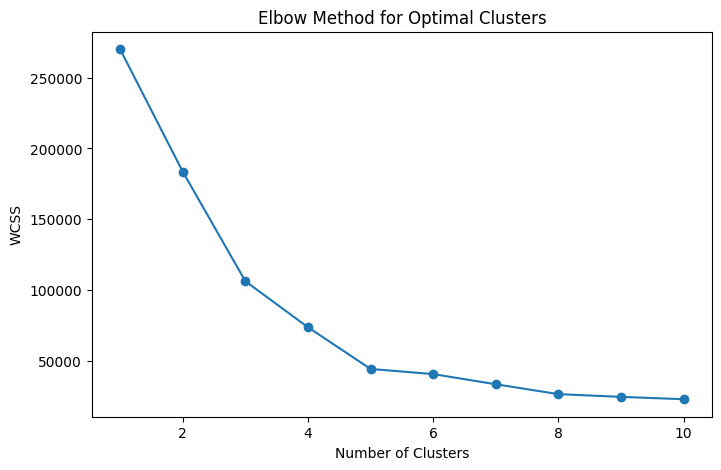

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster information to the dataset
data['Cluster'] = clusters

# Display the dataset with the cluster assignments
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


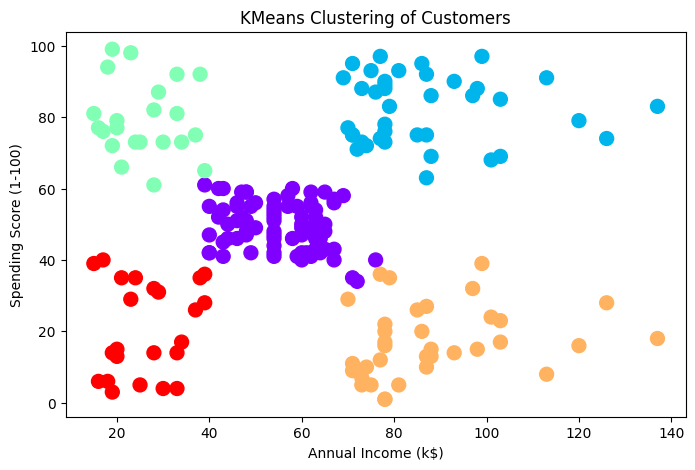

In [6]:
# Plot the clusters
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='rainbow', s=100)
plt.title('KMeans Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Explained Variance Ratio: [0.50981041 0.49018959]


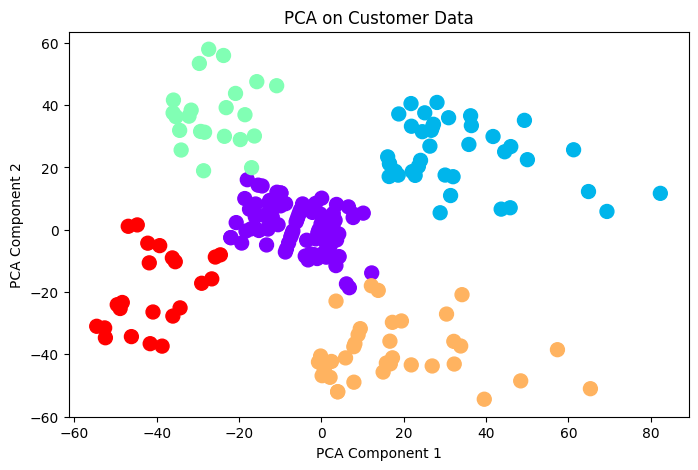

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Add the PCA components to the dataset
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Display the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

# Plot the reduced dimensions
plt.figure(figsize=(8,5))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='rainbow', s=100)
plt.title('PCA on Customer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [8]:
# Print the cluster centers
centroids = kmeans.cluster_centers_
print('Cluster Centers (Annual Income, Spending Score):')
print(centroids)

# Describe each cluster
for i in range(5):
    print(f"Cluster {i}:")
    print(data[data['Cluster'] == i].describe())


Cluster Centers (Annual Income, Spending Score):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster       PCA1       PCA2  
count     81.0  81.000000  81.000000  
mean       0.0  -5.258820   0.718195  
st